# NBA Game Prediction Models ⛹
Authors:
* Parth Shukla
* Matthew Saxsma

Date:
* 04-01-2025

***
## __Libraries__

In [136]:
import pandas as pd
import os
import numpy as np
import pandas as pda
import missingno as msno
import torch
import torch.nn as nn

from torchvision import datasets 
from torchvision import transforms
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# __Path__

In [137]:
# Notbook path
notebook_directory = os.getcwd()
print(f'Current notebook directory: {notebook_directory}')

Current notebook directory: c:\Users\Matth\Desktop\repos\CollabProject


## __Dataset 1__: `NBA-BoxScores-2024-2025.csv`
* 736 NBA player-games from the 2024-2025 season.
*  Contains 440 players.

In [138]:
box_score_data_path = os.path.join(notebook_directory,'data','NBA-BoxScores-2024-2025.csv')
df_boxscores = pd.read_csv(box_score_data_path)
np.shape(df_boxscores)

(736, 30)

In [139]:
df_boxscores.sample(10) # looks like this consists of player-games of the 2024 to 2025 NBA seasons

,Unnamed: 0,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
390,22,22400075,1610612743,DEN,Denver,203967,Dario Šarić,Dario,NaN,NaN,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,-6.0
314,4,22400068,1610612766,CHA,Charlotte,1630163,LaMelo Ball,LaMelo,G,NaN,...,1.0,7.0,8.0,11.0,1.0,1.0,2.0,3.0,34.0,14.0
490,4,22400078,1610612755,PHI,Philadelphia,1630178,Tyrese Maxey,Tyrese,G,NaN,...,0.0,2.0,2.0,4.0,1.0,0.0,1.0,5.0,24.0,-1.0
51,26,22400062,1610612747,LAL,Los Angeles,1641721,Maxwell Lewis,Maxwell,NaN,DNP - Coach's Decision,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,17,22400071,1610612746,LAC,LA,201935,James Harden,James,G,NaN,...,3.0,9.0,12.0,8.0,1.0,0.0,8.0,3.0,29.0,-4.0
134,24,22400070,1610612762,UTA,Utah,1629004,Svi Mykhailiuk,Svi,NaN,DNP - Coach's Decision,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
559,18,22400080,1610612739,CLE,Cleveland,1628378,Donovan Mitchell,Donovan,G,NaN,...,1.0,1.0,2.0,5.0,0.0,0.0,2.0,3.0,19.0,11.0
198,7,22400066,1610612749,MIL,Milwaukee,1626153,Delon Wright,Delon,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0
719,11,22400086,1610612740,NOP,New Orleans,1641810,Antonio Reeves,Antonio,NaN,DNP - Coach's Decision,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,19,22400071,1610612746,LAC,LA,201587,Nicolas Batum,Nicolas,NaN,NaN,...,0.0,2.0,2.0,2.0,1.0,0.0,1.0,3.0,2.0,1.0


# __Dataset 2__: `2025teamstats.csv`
* NBA team stats for the 2024-2025 season.

In [140]:
team_stats2_data_path = os.path.join(notebook_directory,'data','2025teamstats.csv')
df_teamstats2025 = pd.read_csv(team_stats2_data_path)
np.shape(df_teamstats2025)

(31, 25)

In [141]:
df_teamstats2025.sample(10)

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
30,NaN,League Average,57,241.3,41.5,89.2,0.465,13.4,37.5,0.359,...,0.780,11.1,33.1,44.2,26.4,8.3,5.0,14.5,18.9,113.4
1,2.0,Memphis Grizzlies,57,240.0,45.0,93.3,0.482,13.9,37.5,0.372,...,0.769,13.3,34.4,47.7,28.9,9.0,6.0,16.5,21.3,122.8
4,5.0,New York Knicks,57,241.8,44.0,89.3,0.493,12.8,34.1,0.374,...,0.805,10.8,32.2,42.9,27.5,7.9,3.8,13.1,16.9,117.9
23,24.0,Miami Heat,55,243.6,39.7,87.1,0.455,13.9,38.7,0.359,...,0.790,9.7,34.4,44.1,26.1,7.9,3.8,13.6,16.0,110.1
13,14.0,Phoenix Suns,57,241.8,40.7,85.8,0.474,13.9,37.4,0.373,...,0.805,9.1,33.3,42.4,27.4,7.5,5.1,14.0,18.1,113.2
2,3.0,Denver Nuggets,57,241.8,45.7,90.0,0.508,12.0,31.6,0.381,...,0.776,11.3,34.6,45.9,31.2,8.2,4.7,14.3,17.5,121.3
7,8.0,Sacramento Kings,56,243.1,43.3,91.2,0.474,12.4,35.8,0.345,...,0.806,11.1,33.8,44.9,26.9,7.8,4.6,13.5,19.2,116.6
15,16.0,Houston Rockets,57,241.3,41.6,93.2,0.447,12.2,35.5,0.343,...,0.747,14.5,33.4,47.9,22.8,8.7,5.1,13.8,19.8,112.9
8,9.0,Indiana Pacers,55,241.4,43.4,88.7,0.489,12.7,34.4,0.367,...,0.787,9.1,32.5,41.6,28.9,8.5,5.3,13.3,19.2,116.5
6,7.0,Atlanta Hawks,57,241.8,42.6,92.1,0.462,13.1,37.5,0.350,...,0.769,11.9,33.1,45.0,29.3,10.0,5.2,15.8,18.9,117.0


# __Dataset 3__: `TeamStatistics.csv`
* Data from all NBA games.
* From 1946.

In [142]:
# dataset - https://www.kaggle.com/datasets/eoinamoore/historical-nba-data-and-player-box-scores/
games_big_data_path = os.path.join(notebook_directory,'data','TeamStatistics.csv')
df_games_big = pd.read_csv(games_big_data_path)
np.shape(df_games_big)

(142836, 48)

In [143]:
df_games_big.sample(7) # quick look at the data

,gameId,gameDate,teamCity,teamName,teamId,opponentTeamCity,opponentTeamName,opponentTeamId,home,win,...,leadChanges,pointsFastBreak,pointsFromTurnovers,pointsInThePaint,pointsSecondChance,timesTied,timeoutsRemaining,seasonWins,seasonLosses,coachId
129183,26800486,1969-03-01 19:00:00,Los Angeles,Lakers,1610612747,San Diego,Rockets,1610612745,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77876,29500360,1995-12-23 20:00:00,Seattle,SuperSonics,1610612760,Washington,Bullets,1610612764,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88870,29000758,1991-03-02 20:00:00,Dallas,Mavericks,1610612742,Miami,Heat,1610612748,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94029,28800451,1989-01-19 20:00:00,Washington,Bullets,1610612764,San Antonio,Spurs,1610612759,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22258,21600483,2016-12-28 21:00:00,Denver,Nuggets,1610612743,Minnesota,Timberwolves,1610612750,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54159,40400174,2005-04-30 17:30:00,Houston,Rockets,1610612745,Dallas,Mavericks,1610612742,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139127,25600013,1956-11-04 19:00:00,Ft. Wayne Zollner,Pistons,1610612765,New York,Knicks,1610612752,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
df_games_big.coachId.unique() # nothing in coach id column. We'll get rid of it.
df_games_big = df_games_big.drop(columns=['coachId'])

In [145]:
# checking what is redundant across rows of same game
df_games_big.loc[2240:2241,].T # we should check for NaNs

,2240,2241
gameId,22301095,22301095
gameDate,2024-04-02 19:00:00,2024-04-02 19:00:00
teamCity,Milwaukee,Washington
teamName,Bucks,Wizards
teamId,1610612749,1610612764
opponentTeamCity,Washington,Milwaukee
opponentTeamName,Wizards,Bucks
opponentTeamId,1610612764,1610612749
home,0,1
win,0,1


Missingness of df_teams

In [146]:
# missing percentage per column
cols_without_missing = []
for col in df_games_big.columns:
    missing_percent = df_games_big[col].isna().sum()/len(df_games_big)
    if missing_percent > 0.30: # if more than 30% of the column is missing, we want to drop it
        cols_without_missing.append(False)
    else: 
        cols_without_missing.append(True)

# removing the columns with too many missing values
df_games_big = df_games_big[df_games_big.columns[cols_without_missing]]

# __Dataset 4__: `Games.csv`
* This data also contains information on every NBA game. 
* Each row is a game, which specifies the home and away teams
* This is different than the previous dataset, which has two rows for each game.

In [147]:
games_small_data_path = os.path.join(notebook_directory,'data','Games.csv')
df_games_small = pd.read_csv(games_small_data_path)
np.shape(df_games_small)

C:\Users\Matth\AppData\Local\Temp\ipykernel_26460\4217729876.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_games_small = pd.read_csv(games_small_data_path)


(71418, 17)

In [148]:
df_games_small.sample(7)

,gameId,gameDate,hometeamCity,hometeamName,hometeamId,awayteamCity,awayteamName,awayteamId,homeScore,awayScore,winner,gameType,attendance,arenaId,gameLabel,gameSubLabel,seriesGameNumber
3411,22200217,2022-11-16 20:00:00,New Orleans,Pelicans,1610612740,Chicago,Bulls,1610612741,124,110,1610612740,Regular Season,14658.0,160,NaN,NaN,NaN
19629,21000175,2010-11-19 19:30:00,Miami,Heat,1610612748,Charlotte,Bobcats,1610612766,95,87,1610612748,Regular Season,19600.0,146,NaN,NaN,NaN
46466,28801000,1989-04-20 20:00:00,New York,Knicks,1610612752,Boston,Celtics,1610612738,137,117,1610612752,Regular Season,19591.0,30,NaN,NaN,NaN
16200,21201082,2013-03-29 20:30:00,San Antonio,Spurs,1610612759,Los Angeles,Clippers,1610612746,104,102,1610612759,Regular Season,18581.0,199,NaN,NaN,NaN
29415,20300237,2003-12-01 20:30:00,Chicago,Bulls,1610612741,Milwaukee,Bucks,1610612749,97,87,1610612741,Regular Season,17140.0,66,NaN,NaN,NaN
20367,20900860,2010-02-26 19:00:00,Washington,Wizards,1610612764,New York,Knicks,1610612752,116,118,1610612752,Regular Season,17408.0,77,NaN,NaN,NaN
24108,10700070,2007-10-19 22:00:00,Portland,Trail Blazers,1610612757,Sacramento,Kings,1610612758,101,77,1610612757,Preseason,13803.0,51,NaN,NaN,NaN


# Consolidating Datasets 3 and 4
* Dataset 3: `TeamStatistics.csv` has 142,836 rows, 2 per game
* Dataset 4: `Games.csv` has 71,418 rows, 1 per game

In [149]:
# both datasets with games have a game ID and a game date
print(f"Shared columns:\n\n\t{df_games_small.columns[df_games_small.columns.isin(df_games_big.columns)]}\n\n") 

# columns of df_games_big NOT in df_games
print(f"Columns of big df not in smaller:\n\n\t{df_games_big.columns[~df_games_big.columns.isin(df_games_small.columns)]}\n\n")

 # columns of df_games NOT in df_games_big
print(f"Columns of small df not in big:\n\n\t{df_games_small.columns[~df_games_small.columns.isin(df_games_big.columns)]}\n\n")

Shared columns:

	Index(['gameId', 'gameDate'], dtype='object')


Columns of big df not in smaller:

	Index(['teamCity', 'teamName', 'teamId', 'opponentTeamCity',
       'opponentTeamName', 'opponentTeamId', 'home', 'win', 'teamScore',
       'opponentScore', 'assists', 'blocks', 'steals', 'fieldGoalsAttempted',
       'fieldGoalsMade', 'fieldGoalsPercentage', 'threePointersAttempted',
       'threePointersMade', 'threePointersPercentage', 'freeThrowsAttempted',
       'freeThrowsMade', 'freeThrowsPercentage', 'reboundsDefensive',
       'reboundsOffensive', 'reboundsTotal', 'foulsPersonal', 'turnovers',
       'plusMinusPoints', 'numMinutes'],
      dtype='object')


Columns of small df not in big:

	Index(['hometeamCity', 'hometeamName', 'hometeamId', 'awayteamCity',
       'awayteamName', 'awayteamId', 'homeScore', 'awayScore', 'winner',
       'gameType', 'attendance', 'arenaId', 'gameLabel', 'gameSubLabel',
       'seriesGameNumber'],
      dtype='object')




In [150]:
# subsetting by home teams
df_games_big_home = df_games_big[df_games_big.home == 1]
print(f"Home teams data size: {df_games_big_home.shape}")

# subsetting by away teams
df_games_big_away = df_games_big[df_games_big.home == 0]
print(f"Away teams data size: {df_games_big_away.shape}")


Home teams data size: (71418, 31)
Away teams data size: (71418, 31)


In [151]:
# merging home and away teams dataframes
df_games_wide = df_games_big_home.merge(right=df_games_big_away,how='inner',on='gameId',suffixes=('_home','_away'))
print(df_games_wide.shape)
df_games_wide.sample(6)


(71418, 61)


,gameId,gameDate_home,teamCity_home,teamName_home,teamId_home,opponentTeamCity_home,opponentTeamName_home,opponentTeamId_home,home_home,win_home,...,freeThrowsAttempted_away,freeThrowsMade_away,freeThrowsPercentage_away,reboundsDefensive_away,reboundsOffensive_away,reboundsTotal_away,foulsPersonal_away,turnovers_away,plusMinusPoints_away,numMinutes_away
26019,20500886,2006-03-06 21:00:00,Denver,Nuggets,1610612743,Memphis,Grizzlies,1610612763,1,1,...,32.0,22.0,0.688,19.0,2.0,21.0,19.0,11.0,-14.0,240.0
175,22400650,2025-01-27 19:30:00,Boston,Celtics,1610612738,Houston,Rockets,1610612745,1,0,...,21.0,15.0,0.714,27.0,12.0,39.0,22.0,7.0,2.0,240.0
64913,26800161,1968-12-03 19:00:00,San Francisco,Warriors,1610612744,Seattle,SuperSonics,1610612760,1,1,...,33.0,26.0,0.788,NaN,NaN,NaN,22.0,NaN,-5.0,240.0
41366,29300295,1993-12-19 20:00:00,Portland,Trail Blazers,1610612757,Milwaukee,Bucks,1610612749,1,1,...,24.0,15.0,0.625,24.0,5.0,29.0,20.0,8.0,-12.0,240.0
2241,22300062,2023-10-24 22:00:00,Golden State,Warriors,1610612744,Phoenix,Suns,1610612756,1,0,...,17.0,13.0,0.765,43.0,17.0,60.0,22.0,19.0,4.0,240.0
4374,22100650,2022-01-15 21:30:00,Dallas,Mavericks,1610612742,Orlando,Magic,1610612753,1,1,...,16.0,11.0,0.688,32.0,5.0,37.0,26.0,17.0,-16.0,240.0


In [152]:
# merging df_games and home and away teams (df_games_wide) dataframes to make one big df_games dataframe
df_games = df_games_small.merge(right=df_games_wide,how='inner',on='gameId',suffixes=('_teams','_games'))
print(df_games.shape)
df_games.sample(7)

(71418, 77)


,gameId,gameDate,hometeamCity,hometeamName,hometeamId,awayteamCity,awayteamName,awayteamId,homeScore,awayScore,...,freeThrowsAttempted_away,freeThrowsMade_away,freeThrowsPercentage_away,reboundsDefensive_away,reboundsOffensive_away,reboundsTotal_away,foulsPersonal_away,turnovers_away,plusMinusPoints_away,numMinutes_away
37400,29600641,1997-02-01 19:30:00,Cleveland,Cavaliers,1610612739,Miami,Heat,1610612748,66,71,...,21.0,17.0,0.810,31.0,7.0,38.0,18.0,16.0,5.0,240.0
26246,20500659,2006-01-31 20:30:00,Dallas,Mavericks,1610612742,Chicago,Bulls,1610612741,98,94,...,31.0,22.0,0.710,29.0,21.0,50.0,28.0,14.0,-4.0,240.0
61779,27200568,1973-03-08 19:00:00,Kansas City-Omaha,Kings,1610612758,Baltimore,Bullets,1610612764,105,93,...,8.0,7.0,0.875,NaN,NaN,NaN,21.0,NaN,-12.0,240.0
32350,20001114,2001-04-09 20:00:00,Indiana,Pacers,1610612754,Washington,Wizards,1610612764,100,78,...,19.0,14.0,0.737,27.0,17.0,44.0,27.0,21.0,NaN,240.0
68077,26000245,1961-02-12 19:00:00,Boston,Celtics,1610612738,Philadelphia,Warriors,1610612744,136,125,...,38.0,23.0,0.605,NaN,0.0,0.0,26.0,0.0,-11.0,240.0
34583,29900149,1999-11-21 15:00:00,Vancouver,Grizzlies,1610612763,Minnesota,Timberwolves,1610612750,81,105,...,23.0,15.0,0.652,33.0,14.0,47.0,22.0,18.0,24.0,240.0
17724,21100737,2012-03-27 20:00:00,Milwaukee,Bucks,1610612749,Atlanta,Hawks,1610612737,108,101,...,17.0,10.0,0.588,29.0,13.0,42.0,16.0,22.0,-7.0,240.0


In [153]:
# print(df_games.columns.tolist())
# columns to drop
drop_cols = ['hometeamCity',
            'awayteamCity',
            'hometeamId',
            'awayteamCity',
            'awayteamId',
            'gameDate_home',
            'teamCity_home',
            'teamName_home',
            'teamId_home',
            'opponentTeamCity_home',
            'opponentTeamName_home',
            'opponentTeamId_home',
            'home_home',
            'teamScore_home',
            'opponentScore_home',
            'numMinutes_home',
            'gameDate_away',
            'teamCity_away',
            'teamName_away',
            'teamId_away',
            'opponentTeamCity_away',
            'opponentTeamName_away',
            'opponentTeamId_away',
            'home_away',
            'win_away',
            'teamScore_away',
            'opponentScore_away',
            'numMinutes_away']

df_games['gameDate'] = pd.to_datetime(df_games['gameDate'])

df_games.drop(columns=drop_cols,inplace=True) # dropping redundant columns
# dropping redundant columns
print(f"New dimensions of df_games: {df_games.shape}\n")

print(f"Remaining columns:\n\n\t{df_games.columns.tolist()}")
df_games.head()

New dimensions of df_games: (71418, 50)

Remaining columns:

	['gameId', 'gameDate', 'hometeamName', 'awayteamName', 'homeScore', 'awayScore', 'winner', 'gameType', 'attendance', 'arenaId', 'gameLabel', 'gameSubLabel', 'seriesGameNumber', 'win_home', 'assists_home', 'blocks_home', 'steals_home', 'fieldGoalsAttempted_home', 'fieldGoalsMade_home', 'fieldGoalsPercentage_home', 'threePointersAttempted_home', 'threePointersMade_home', 'threePointersPercentage_home', 'freeThrowsAttempted_home', 'freeThrowsMade_home', 'freeThrowsPercentage_home', 'reboundsDefensive_home', 'reboundsOffensive_home', 'reboundsTotal_home', 'foulsPersonal_home', 'turnovers_home', 'plusMinusPoints_home', 'assists_away', 'blocks_away', 'steals_away', 'fieldGoalsAttempted_away', 'fieldGoalsMade_away', 'fieldGoalsPercentage_away', 'threePointersAttempted_away', 'threePointersMade_away', 'threePointersPercentage_away', 'freeThrowsAttempted_away', 'freeThrowsMade_away', 'freeThrowsPercentage_away', 'reboundsDefensive_aw

,gameId,gameDate,hometeamName,awayteamName,homeScore,awayScore,winner,gameType,attendance,arenaId,...,threePointersPercentage_away,freeThrowsAttempted_away,freeThrowsMade_away,freeThrowsPercentage_away,reboundsDefensive_away,reboundsOffensive_away,reboundsTotal_away,foulsPersonal_away,turnovers_away,plusMinusPoints_away
0,22400627,2025-03-19 21:00:00,Jazz,Wizards,0,0,1610612764,Regular Season,NaN,1000106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22400828,2025-02-24 22:00:00,Kings,Hornets,130,88,1610612758,Regular Season,17832.0,609,...,0.250,24.0,18.0,0.750,22.0,15.0,37.0,16.0,19.0,-42.0
2,22400827,2025-02-24 21:00:00,Jazz,Trail Blazers,112,114,1610612757,Regular Season,18175.0,1000106,...,0.318,24.0,18.0,0.750,35.0,16.0,51.0,16.0,13.0,2.0
3,22400826,2025-02-24 20:00:00,Thunder,Timberwolves,128,131,1610612750,Regular Season,18203.0,1000052,...,0.281,39.0,34.0,0.872,43.0,11.0,54.0,23.0,13.0,3.0
4,22400825,2025-02-24 19:30:00,Hawks,Heat,98,86,1610612737,Regular Season,16189.0,650,...,0.175,27.0,25.0,0.926,31.0,14.0,45.0,9.0,17.0,-12.0


In [ ]:
# dropping these for now because they are mostly missing
df_games.drop(columns=['gameLabel','gameSubLabel','seriesGameNumber'],inplace=True)

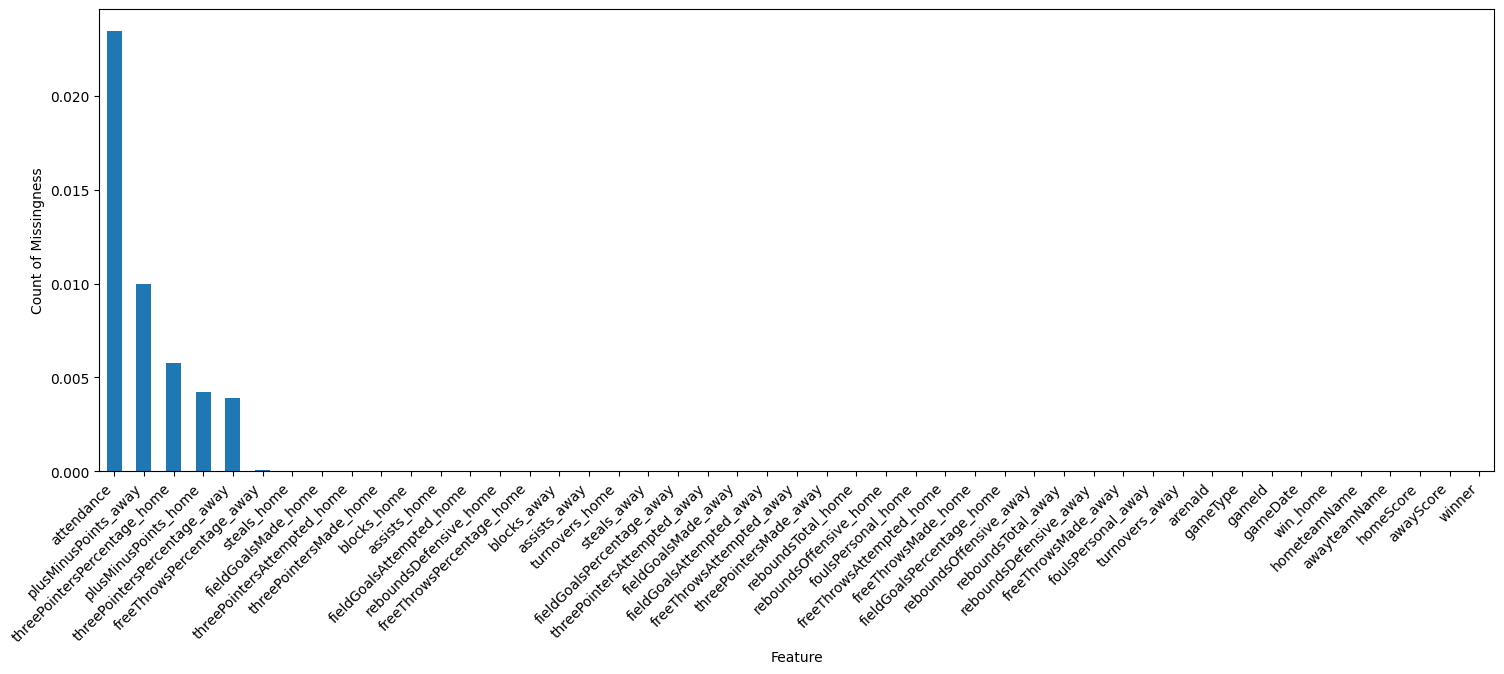

In [175]:
# missingness bar chart
plt.figure(figsize=(18,6))
missing_per_column = df_games.isna().sum().sort_values(ascending=False) / len(df_games)
missing_per_column.plot(kind='bar', xlabel='Feature',ylabel='Count of Missingness')
plt.xticks(rotation=45,ha='right',fontsize=10)
plt.show()


<Figure size 1000x100 with 0 Axes>

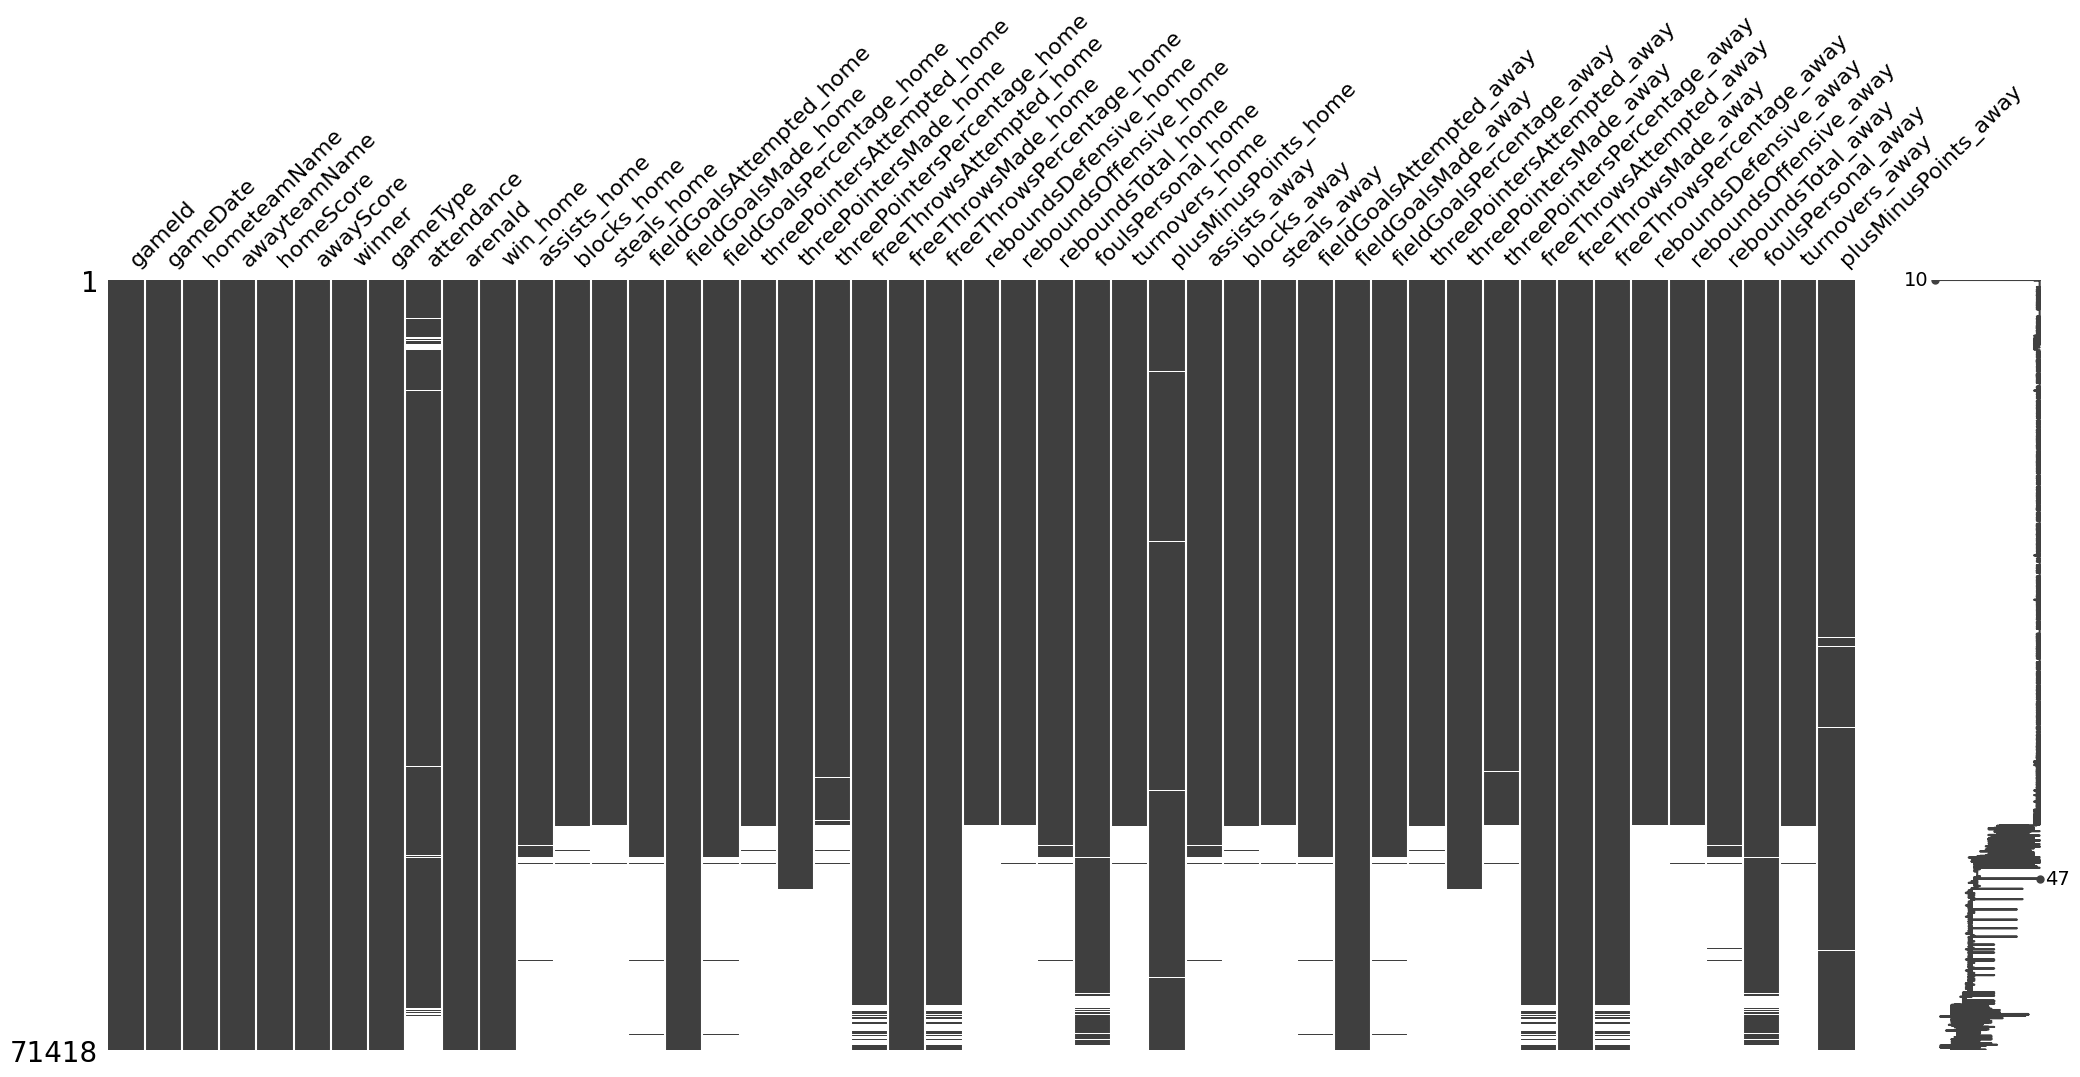

In [158]:

# missingness matrix
plt.figure(figsize=(10,1))
msno.matrix(df_games)
plt.show()


In [ ]:
# I wrote this for loop to figure out where the rows start to have a lot of missing data
# for i in range(50575,50600):
#     print(f"Index {i}: {df_games.iloc[i].isna().sum() / df_games.shape[1]}")

print(len(df_games.iloc[0:50581])) # need to include 50,580 and exclude 50,581
print(df_games.iloc[50580].isna().sum() / df_games.shape[1])

50581
0.02127659574468085


In [172]:
# removing the largely missing rows

df_games = df_games.iloc[0:50581]
df_games.sample(7)

,gameId,gameDate,hometeamName,awayteamName,homeScore,awayScore,winner,gameType,attendance,arenaId,...,threePointersPercentage_away,freeThrowsAttempted_away,freeThrowsMade_away,freeThrowsPercentage_away,reboundsDefensive_away,reboundsOffensive_away,reboundsTotal_away,foulsPersonal_away,turnovers_away,plusMinusPoints_away
48941,28600562,1987-02-13 20:00:00,Trail Blazers,Celtics,116,131,1610612738,Regular Season,12666.0,51,...,0.364,17.0,15.0,0.882,33.0,8.0,41.0,25.0,11.0,15.0
27066,40400135,2005-05-04 19:00:00,Bulls,Wizards,110,112,1610612764,Playoffs,22250.0,66,...,0.167,30.0,18.0,0.600,38.0,11.0,49.0,26.0,16.0,2.0
15797,21300060,2013-11-06 19:00:00,Bobcats,Raptors,92,90,1610612766,Regular Season,11118.0,9,...,0.438,15.0,13.0,0.867,27.0,11.0,38.0,27.0,13.0,-2.0
24093,10700089,2007-10-22 19:30:00,Knicks,Celtics,94,87,1610612752,Preseason,16544.0,30,...,0.208,32.0,26.0,0.813,29.0,12.0,41.0,28.0,16.0,-7.0
14548,41300315,2014-05-29 21:00:00,Spurs,Thunder,117,89,1610612759,Playoffs,18581.0,199,...,0.250,20.0,13.0,0.650,27.0,8.0,35.0,24.0,11.0,-28.0
13364,21401071,2015-03-25 21:30:00,Spurs,Thunder,130,91,1610612759,Regular Season,18581.0,199,...,0.333,14.0,13.0,0.929,27.0,10.0,37.0,15.0,10.0,-39.0
26108,20500798,2006-02-22 21:00:00,Suns,Celtics,103,94,1610612756,Regular Season,18422.0,2,...,0.320,18.0,12.0,0.667,35.0,14.0,49.0,21.0,13.0,-9.0


In [179]:
# Display summary statistics for numerical columns
df_games.describe().round(1)

,gameId,gameDate,homeScore,awayScore,winner,attendance,arenaId,win_home,assists_home,blocks_home,...,threePointersPercentage_away,freeThrowsAttempted_away,freeThrowsMade_away,freeThrowsPercentage_away,reboundsDefensive_away,reboundsOffensive_away,reboundsTotal_away,foulsPersonal_away,turnovers_away,plusMinusPoints_away
count,50581.0,50581,50581.0,50581.0,5.058100e+04,49395.0,50581.0,50581.0,50580.0,50580.0,...,50383.0,50580.0,50580.0,50579.0,50580.0,50580.0,50580.0,50580.0,50580.0,50076.0
mean,24801841.4,2006-04-14 03:46:34.464324352,104.1,100.9,1.610613e+09,16777.8,46569.7,0.6,23.8,5.3,...,0.3,24.5,18.5,0.8,30.4,11.6,42.0,22.1,15.1,-3.1
min,10300001.0,1985-04-17 19:00:00,0.0,0.0,1.610613e+09,250.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.1,4.0,0.0,18.0,5.0,0.0,-73.0
25%,20801168.0,1996-11-15 19:30:00,95.0,92.0,1.610613e+09,14890.0,22.0,0.0,20.0,3.0,...,0.3,19.0,14.0,0.7,26.0,9.0,37.0,19.0,12.0,-12.0
50%,21900524.0,2006-11-25 19:30:00,104.0,100.0,1.610613e+09,17353.0,66.0,1.0,24.0,5.0,...,0.3,24.0,18.0,0.8,30.0,11.0,42.0,22.0,15.0,-4.0
75%,29100418.0,2015-12-16 20:00:00,113.0,110.0,1.610613e+09,19123.0,146.0,1.0,27.0,7.0,...,0.4,30.0,23.0,0.8,34.0,14.0,46.0,25.0,18.0,6.0
max,62400001.0,2025-03-19 21:00:00,175.0,176.0,1.610613e+09,200049.0,1000144.0,1.0,50.0,23.0,...,1.0,64.0,52.0,1.0,60.0,40.0,81.0,52.0,40.0,68.0
std,6708114.6,NaN,13.7,13.5,8.600000e+00,3942.6,210468.9,0.5,5.6,2.7,...,0.1,7.9,6.4,0.1,5.6,4.2,6.6,4.9,4.3,13.4


# __Denoising Autoencoder__

__Step 1.__ Prepare inputs to be corrupted
1. We need to make sure all categorical varialbes are one-hot encoded.
2. Then 'mask' values (replace with 0s?) in corrupted training
3. Add normal/poisson noise to continuous variables (depending on scale)

__Step 2.__ Build Model Architecture

In [94]:
class ae(nn.Module):
    def __init__(self):
        super().__init__() # specifies to run parent torch.nn.Module class __init__ method automatically when I initialize the child 'dae' class I'm making.
        # Encoding layers
        self.encoder = nn.Sequential(
            nn.Linear(46,24), nn.ReLU(),nn.Linear(24, 12), nn.ReLU(), nn.Linear(12,8)
        )
        # Decoding layers
        self.decoder = nn.Sequential(
            nn.Linear(8,12),nn.ReLU(), nn.Linear(12,24), nn.ReLU(), nn.Linear(24, 46)
        )
    def forward(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

__Step 3.__ Instantiate model
* and instantiate loss function and gradient trekking algorithm

In [ ]:
# create instantiation of the model we specified above
model = ae()

loss_function = nn.MSELoss()

# Using an Adam optimizer wtih learning rate of 0.1
# Adam (adaptive moment estimation) is a pretty fancy off the shelf algorithm..it keep track of recent gradient values to dynamically control learning rate and therefore improves convergence
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 1e-1,
                             weight_decay=1e-8)

__Step 4.__ Set up training regimen
1. We need to use the proper loss function for one-hot encoded features (binary cross-entropy; BCE).
2. Then, specify a composite loss function that includes both binary feature loss (BCE) and continiuous feature loss (MSE).

In [ ]:
epochs = 20
outputs = []
losses = []

for epoch in range(epochs):
    for (image, _) in loader:
        # reshape image to be of uniform input for the model
        image = image.reshape(-1,28 * 28)
        # store output of autoencoder
        reconstructed = model(image)
        # calculate loss
        loss = loss_function(reconstructed, image)
        # start gradient at 0
        # compute and store gradient
        # .step() method performs parameter updates
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Storing the losses in a list for plotting
        losses.append(loss)
        outputs.append((epochs, image, reconstructed))
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
# Plotting the last 100 value
losses_np = [loss.detach().numpy() for loss in losses]
plt.plot(losses_np[-100:])
plt.show()
num_images = 5
for i in range(num_images):
    original = image[i].reshape(28, 28)
    reconstructed = reconstructed[i].reshape(28,28)
    fig, axes = plt.subplots(1,2,figsize = (8,4))
   # Original image on the left
    axes[0].imshow(original, cmap='gray')
    axes[0].set_title(f"Original {i}")
    axes[0].axis('off')  # Hide axes for better visualization

    # Reconstructed image on the right
    axes[1].imshow(reconstructed, cmap='gray')
    axes[1].set_title(f"Reconstructed {i}")
    axes[1].axis('off')  # Hide axes for better visualization

    # Display the pair
    plt.show()
for i, item in enumerate(image):
  # Reshape the array for plotting
  item = item.reshape(-1, 28, 28)
  plt.imshow(item[0])
  plt.show()
for i, item in enumerate(reconstructed):
  item = item.reshape(-1, 28, 28)
  plt.imshow(item[0])
  plt.show()
batch_images = reconstructed.detach().reshape(-1, 28, 28)  # Reshape batch to (batch_size, 28, 28)
for i in range(5):  # Show first 5 images
    plt.imshow(batch_images[i].numpy(), cmap='gray')
    plt.title(f"Image {i}")
    plt.show()

# __Random Forest Regressor__

In [ ]:
team1 = input("Enter Team 1:")
team2 = input("Enter Team 2:")

team1_df = df_teams[(df_teams['teamName'] == team1) & (df_teams['opponentTeamName'] == team2)]
team1_df

team2_df = df_teams[(df_teams['teamName'] == team2) & (df_teams['opponentTeamName'] == team1)]
team2_df

#model for team1
features = ['assists', 'blocks', 'steals', 'fieldGoalsMade', 'fieldGoalsPercentage', 'threePointersMade', 'freeThrowsMade', 'reboundsTotal', 'turnovers']
x = team1_df[features]
y = team1_df['teamScore']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

#model for team2
features2 = ['assists', 'blocks', 'steals', 'fieldGoalsMade', 'fieldGoalsPercentage', 'threePointersMade', 'freeThrowsMade', 'reboundsTotal', 'turnovers']
x = team2_df[features]
y = team2_df['teamScore']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
team1_score = team1_df[['assists', 'blocks', 'steals', 'fieldGoalsMade', 'fieldGoalsPercentage', 'threePointersMade', 'freeThrowsMade', 'reboundsTotal', 'turnovers']]
team2_score = team2_df[['assists', 'blocks', 'steals', 'fieldGoalsMade', 'fieldGoalsPercentage', 'threePointersMade', 'freeThrowsMade', 'reboundsTotal', 'turnovers']]

predicted_score1 = model.predict(team1_score)[0]
predicted_score2 = model2.predict(team2_score)[0]

print(f'{team1} Score: {predicted_score1}')
print(f'{team2} Score: {predicted_score2}')

Bulls Score: 107.29
Celtics Score: 122.48
